In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
inf = 'test/'
norm = 1.028

emc = pd.read_csv(inf + "dataframes/final/He3_H2.csv", index_col = 0)
emc['RatioNorm'] = emc.Ratio.apply(lambda x: x*norm)
emc['IsoNorm'] = emc.Isoscalar_Ratio.apply(lambda x: x*norm)

outf = 'Plots/Results_Plots/'

In [3]:
fit_data = emc.query('BinCenter>=0.35 & BinCenter<=0.70')

display(fit_data)

coef, cov = np.polyfit(fit_data.BinCenter,fit_data.IsoNorm,deg = 1, w = fit_data.apply(lambda x: 1/((x.RelIsoscalarRatioError*x.IsoNorm)**2),axis=1), cov = 'unscaled')
fitline = np.poly1d(coef)
print(coef)
print(cov)

,Ratio,Counts,RelSyst,BinCenter,RelPre,PositronCor,PositronError,ECCCor,ECCError,CCor,...,He3RC,H2RC,RCErr,Isoscalar_Ratio,IsoCor,IsoCorError,RelRatioError,RelIsoscalarRatioError,RatioNorm,IsoNorm
6,1.062889,90508,0.006093,0.375,0.007376,0.999696,0.000204,0.990423,0.000519,1.000795,...,1.025627,1.028893,0.005,0.978899,0.920979,0.004832,0.009567,0.010718,1.092650,1.006308
7,1.052757,60769,0.006110,0.405,0.008585,0.999718,0.000190,0.991127,0.000569,1.000853,...,1.009943,1.013024,0.005,0.965229,0.916859,0.004902,0.010538,0.011622,1.082234,0.992256
8,1.037078,55860,0.006134,0.435,0.008893,0.999745,0.000172,0.991779,0.000615,1.000918,...,0.995325,0.998366,0.005,0.946777,0.912927,0.005294,0.010804,0.012031,1.066117,0.973287
9,1.052750,54670,0.006149,0.465,0.008892,0.999776,0.000153,0.992383,0.000655,1.000992,...,0.981628,0.984733,0.005,0.957154,0.909194,0.005214,0.010811,0.012003,1.082227,0.983954
10,1.074285,59087,0.006149,0.495,0.008491,0.999805,0.000134,0.992943,0.000687,1.001075,...,0.968910,0.971792,0.005,0.972946,0.905669,0.005073,0.010483,0.011646,1.104365,1.000189
11,1.078081,48458,0.006139,0.525,0.009430,0.999833,0.000116,0.993461,0.000712,1.001167,...,0.956773,0.959603,0.005,0.972817,0.902360,0.005308,0.011252,0.012441,1.108267,1.000056
12,1.061487,49390,0.006132,0.555,0.009254,0.999859,0.000099,0.993942,0.000730,1.001270,...,0.945171,0.947878,0.005,0.954570,0.899276,0.005303,0.011102,0.012303,1.091209,0.981297
13,1.056329,45271,0.006136,0.585,0.009645,0.999882,0.000084,0.994387,0.000742,1.001385,...,0.934217,0.936683,0.005,0.946919,0.896424,0.005539,0.011431,0.012703,1.085906,0.973432
14,1.055206,41074,0.006153,0.615,0.010109,0.999901,0.000071,0.994800,0.000749,1.001512,...,0.923568,0.925850,0.005,0.943156,0.893813,0.005788,0.011834,0.013174,1.084751,0.969565
15,1.078899,38747,0.006175,0.645,0.010373,0.999918,0.000059,0.995182,0.000752,1.001652,...,0.913348,0.915498,0.005,0.961783,0.891449,0.005692,0.012072,0.013346,1.109108,0.988713


[-0.08868958  1.03144837]
[[ 0.00187965 -0.00094442]
 [-0.00094442  0.00049078]]


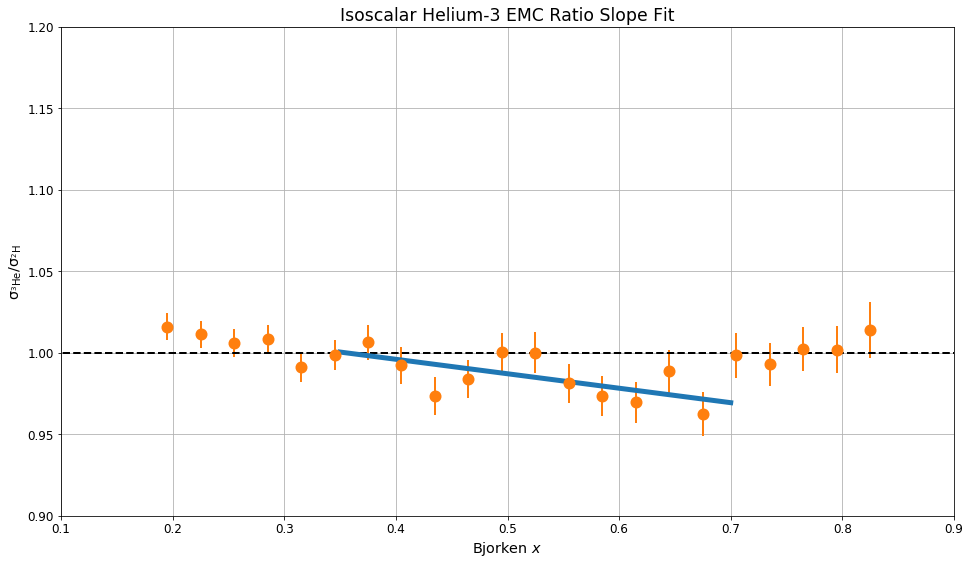

In [4]:
plt.figure(figsize=(16,9))
plt.plot([0,1],[1,1],'k--',linewidth=2)
plt.errorbar(emc['BinCenter'],emc['IsoNorm'],emc['RelIsoscalarRatioError']*emc['IsoNorm'],fmt='C1o',label="Isoscalar $^3$He EMC Ratio",ms=10,mew=2,elinewidth=2)
plt.plot([0.35,0.7],fitline([0.35,0.7]),'-',lw=5)

#x = np.arange(0.35,0.7,0.01)
#plt.fill_between(x,fitline(x)-cov[0][0],fitline(x)+cov[0][0],alpha=0.5)

plt.gca().set(ylim=(0.9,1.2), xlim=(0.1,0.9))
#plt.legend(loc=2,fontsize='x-large')
plt.title("Isoscalar Helium-3 EMC Ratio Slope Fit",fontsize='xx-large')
plt.xlabel('Bjorken $x$',fontsize='x-large')
plt.ylabel(r'$\mathrm{\sigma_{^{3}He}/\sigma_{^{2}H}}$',fontsize='x-large')
plt.xticks(np.arange(0.1,0.901,0.1),fontsize='large')
plt.yticks(np.arange(0.9,1.21,0.05),fontsize='large')
plt.grid()
#plt.text(0.15, 0.91,'PRELIMINARY',fontsize=100, color='gray', alpha=0.5)

plt.savefig(outf + 'slope_fit.eps')

plt.show()

Put He3 data in a DataFrame for plotting

In [5]:
# marathon = pd.DataFrame(columns = ['Slope', 'Slope_Error', 'A', 'SND', 'BE_A', 'RSIE_A', 'NSep', 'a2', 'a2_Error'], index=['He3'])
# marathon.index.name = 'Target'
# marathon.at['He3','Slope'] = np.abs(coef[0])
# marathon.at['He3','Slope_Error'] = cov[0][0]**(1/2)
# marathon.at['He3','A'] = 3
# marathon.at['He3','SND'] = 1.899
# marathon.at['He3','BE_A'] = 2.573
# marathon.at['He3','RSIE_A'] = 2.901
# marathon.at['He3','NSep'] = 17.95
# marathon.at['He3','a2'] = 2.13
# marathon.at['He3','a2_Error'] = 0.04

marathon = pd.DataFrame(data = {'Target' : ['He3'], 'Slope' : [np.abs(coef[0])], 
                        'Slope_Error' : [cov[0][0]**(1/2)],
                        'A' : [3],
                        'SND' : [1.899],
                        'BE_A' : [2.573],
                        'RSIE_A' : [2.901],
                        'NSep' : [17.95],
                        'a2' : [2.13],
                        'a2_Error' : [0.04]})
# marathon.at[0,'Slope'] = np.abs(coef[0])
# marathon.at[0,'Slope_Error'] = cov[0][0]**(1/2)
# marathon.at[0,'A'] = 3
# marathon.at[0,'SND'] = 1.899
# marathon.at[0,'BE_A'] = 2.573
# marathon.at[0,'RSIE_A'] = 2.901
# marathon.at[0.,'NSep'] = 17.95
# marathon.at[0,'a2'] = 2.13
# marathon.at[0,'a2_Error'] = 0.04

marathon.SND = marathon.apply(lambda x: 3*(x.A-1)/(4*np.pi*((5*x.SND*x.SND/3)**(3/2))), axis=1)

Get slope data from other experiments.
These have already been processed.

In [6]:
E139 = pd.read_csv('other_emc/e139/e139_slopes.csv')
E03103 = pd.read_csv('other_emc/e03-103/e03-103_slopes.csv')
CLAS = pd.read_csv('other_emc/clas/clas_slopes.csv')

# From debugging
# display(E139.dtypes)
# display(E03103.dtypes)
# display(CLAS.dtypes)
# display(marathon.dtypes)

In [7]:
concat = pd.concat([marathon, E139, E03103, CLAS])
targs = concat.index.unique()

annotations = concat.groupby('Target').mean()
display(annotations)

# From debugging
# display(concat.dtypes)
# display(targs)

#Make Target the index
#Read about groupby

,Slope,Slope_Error,A,SND,BE_A,RSIE_A,NSep,a2,a2_Error
Target,,,,,,,,,
Ag108,0.515296,0.043590,108,0.125619,8.542,11.530,54.95,0.00,0.00
Al27,0.351382,0.030537,27,0.101276,8.332,9.699,48.58,5.30,0.60
Au197,0.458884,0.051346,197,0.146072,7.916,11.730,57.74,5.13,0.21
Be9,0.249152,0.027836,9,0.056132,6.463,6.918,41.18,3.91,0.12
C12,0.313952,0.024540,12,0.081090,7.680,8.455,45.34,4.65,0.14
Ca40,0.329109,0.040080,40,0.103565,8.551,10.520,51.81,0.00,0.00
Fe56,0.451343,0.026235,56,0.115720,8.790,10.940,51.53,4.75,0.29
He3,0.059987,0.027924,3,0.032404,2.573,2.901,17.95,2.13,0.04
He4,0.190504,0.024755,4,0.070074,7.074,7.298,40.07,3.57,0.09


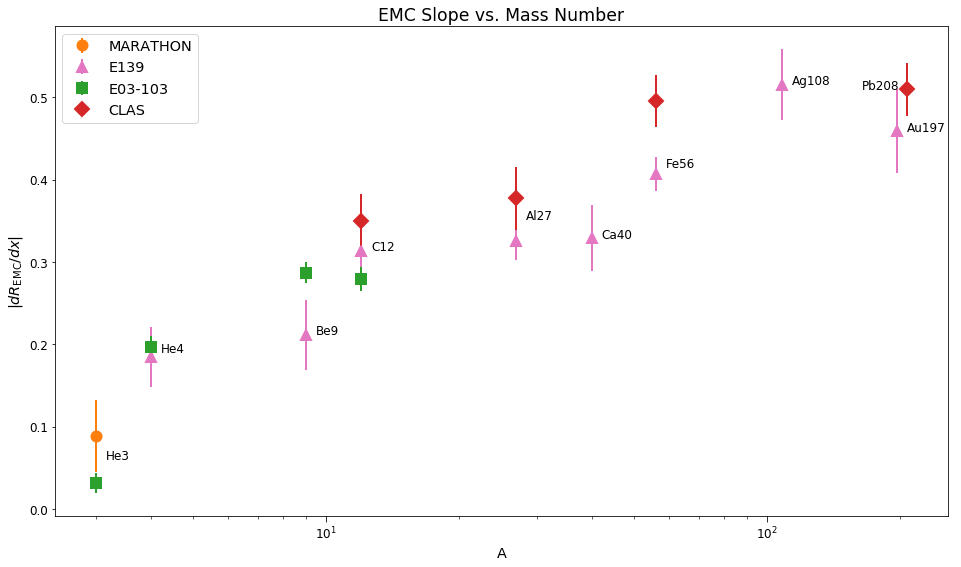

In [8]:
plt.figure(figsize=(16,9))
plt.errorbar(x=marathon.A, y=marathon.Slope, yerr=marathon.Slope_Error, fmt='C1o', label = 'MARATHON', ms=10, mew=2, elinewidth=2)
plt.errorbar(x=E139.A, y=E139.Slope, yerr=E139.Slope_Error, fmt='C6^', label = 'E139', ms=10, mew=2, elinewidth=2)
plt.errorbar(x=E03103.A, y=E03103.Slope, yerr=E03103.Slope_Error, fmt='C2s', label = 'E03-103', ms=10, mew=2, elinewidth=2)
plt.errorbar(x=CLAS.A, y=CLAS.Slope, yerr=CLAS.Slope_Error, fmt='C3D', label = 'CLAS', ms=10, mew=2, elinewidth=2)

plt.legend(loc=2,fontsize='x-large')
plt.title('EMC Slope vs. Mass Number',fontsize='xx-large')
plt.xlabel('A',fontsize='x-large')
plt.ylabel(r'$\left|dR_{\mathrm{EMC}}/dx\right|$',fontsize='x-large')

plt.xticks(fontsize='large')
plt.yticks(fontsize='large')

plt.gca().tick_params(axis='both', which='minor', length=3)
plt.gca().tick_params(axis='x', which='major', length=6)

for index, row in annotations.iterrows():
    if index == 'Be9' or index == 'Fe56':
        plt.annotate(index, xy = (row.A,row.Slope), xytext = (10,-30), textcoords = 'offset points',size = 'large')
    elif index == 'Pb208':
        plt.annotate(index, xy = (row.A,row.Slope), xytext = (-45,0), textcoords = 'offset points',size = 'large')
    else:
        plt.annotate(index, xy = (row.A,row.Slope), xytext = (10,0), textcoords = 'offset points',size = 'large')

plt.xscale('log')

plt.savefig(outf + 'EMC_vs_A.eps')

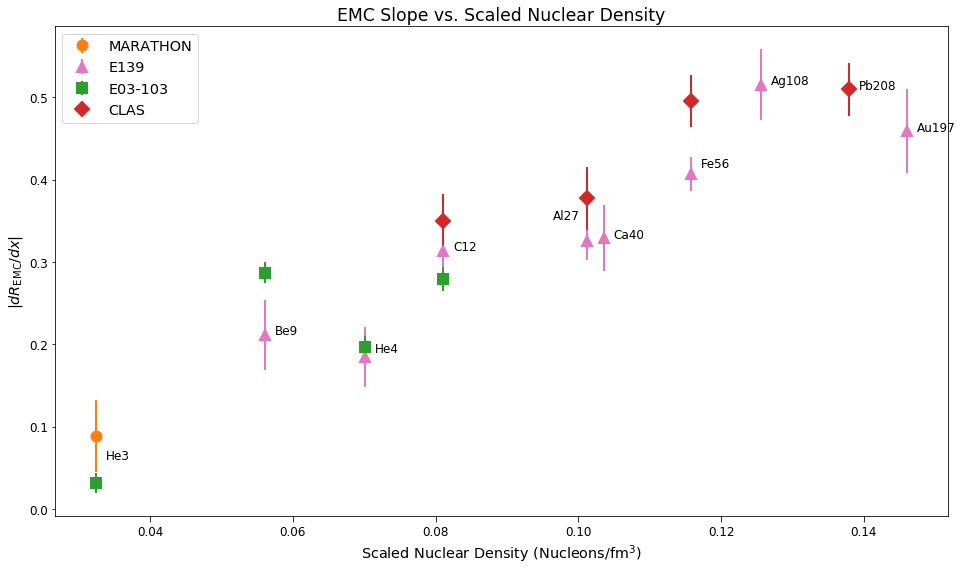

In [9]:
plt.figure(figsize=(16,9))
plt.errorbar(x=marathon.SND, y=marathon.Slope, yerr=marathon.Slope_Error, fmt='C1o', label = 'MARATHON', ms=10, mew=2, elinewidth=2)
plt.errorbar(x=E139.SND, y=E139.Slope, yerr=E139.Slope_Error, fmt='C6^', label = 'E139', ms=10, mew=2, elinewidth=2)
plt.errorbar(x=E03103.SND, y=E03103.Slope, yerr=E03103.Slope_Error, fmt='C2s', label = 'E03-103', ms=10, mew=2, elinewidth=2)
plt.errorbar(x=CLAS.SND, y=CLAS.Slope, yerr=CLAS.Slope_Error, fmt='C3D', label = 'CLAS', ms=10, mew=2, elinewidth=2)

plt.legend(loc=2,fontsize='x-large')
plt.title('EMC Slope vs. Scaled Nuclear Density',fontsize='xx-large')
plt.xlabel('Scaled Nuclear Density (Nucleons/fm$^3$)',fontsize='x-large')
plt.ylabel(r'$\left|dR_{\mathrm{EMC}}/dx\right|$',fontsize='x-large')

plt.xticks(fontsize='large')
plt.yticks(fontsize='large')

plt.gca().tick_params(axis='both', which='minor', length=3)
plt.gca().tick_params(axis='x', which='major', length=6)

for index, row in annotations.iterrows():
    if index == 'Al27':
        plt.annotate(index, xy = (row.SND,row.Slope), xytext = (-35,0), textcoords = 'offset points',size = 'large')
    elif index == 'Be9' or index == 'Fe56':
        plt.annotate(index, xy = (row.SND,row.Slope), xytext = (10,-30), textcoords = 'offset points',size = 'large')
    else:
        plt.annotate(index, xy = (row.SND,row.Slope), xytext = (10,0), textcoords = 'offset points',size = 'large')

#plt.xscale('log')

plt.savefig(outf + 'EMC_vs_SND.eps')

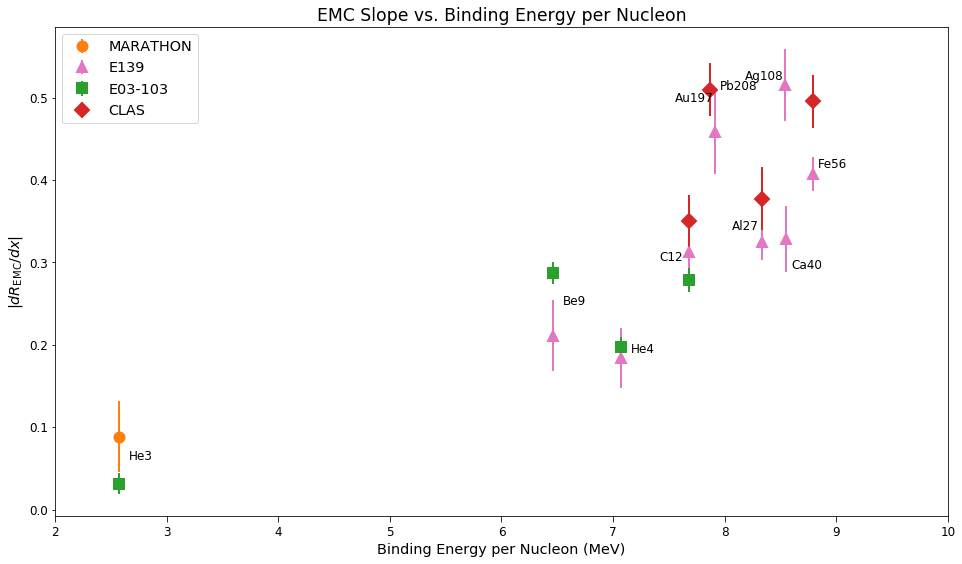

In [10]:
plt.figure(figsize=(16,9))
plt.errorbar(x=marathon.BE_A, y=marathon.Slope, yerr=marathon.Slope_Error, fmt='C1o', label = 'MARATHON', ms=10, mew=2, elinewidth=2)
plt.errorbar(x=E139.BE_A, y=E139.Slope, yerr=E139.Slope_Error, fmt='C6^', label = 'E139', ms=10, mew=2, elinewidth=2)
plt.errorbar(x=E03103.BE_A, y=E03103.Slope, yerr=E03103.Slope_Error, fmt='C2s', label = 'E03-103', ms=10, mew=2, elinewidth=2)
plt.errorbar(x=CLAS.BE_A, y=CLAS.Slope, yerr=CLAS.Slope_Error, fmt='C3D', label = 'CLAS', ms=10, mew=2, elinewidth=2)

plt.gca().set(xlim=(2,10))

plt.legend(loc=2,fontsize='x-large')
plt.title('EMC Slope vs. Binding Energy per Nucleon',fontsize='xx-large')
plt.xlabel('Binding Energy per Nucleon (MeV)',fontsize='x-large')
plt.ylabel(r'$\left|dR_{\mathrm{EMC}}/dx\right|$',fontsize='x-large')

plt.xticks(fontsize='large')
plt.yticks(fontsize='large')

plt.gca().tick_params(axis='both', which='minor', length=3)
plt.gca().tick_params(axis='x', which='major', length=6)

for index, row in annotations.iterrows():
    if index == 'C12' or index == 'Al27':
        plt.annotate(index, xy = (row.BE_A,row.Slope), xytext = (-30,-10), textcoords = 'offset points',size = 'large')
    elif index == 'Ag108':
        plt.annotate(index, xy = (row.BE_A,row.Slope), xytext = (-40,5), textcoords = 'offset points',size = 'large')
    elif index == 'Au197':
        plt.annotate(index, xy = (row.BE_A,row.Slope), xytext = (-40,30), textcoords = 'offset points',size = 'large')
    elif index == 'Ca40' or index == 'Fe56':
        plt.annotate(index, xy = (row.BE_A,row.Slope), xytext = (5,-30), textcoords = 'offset points',size = 'large')
    else:
        plt.annotate(index, xy = (row.BE_A,row.Slope), xytext = (10,0), textcoords = 'offset points',size = 'large')

#plt.xscale('log')

plt.savefig(outf + 'EMC_vs_BE.eps')

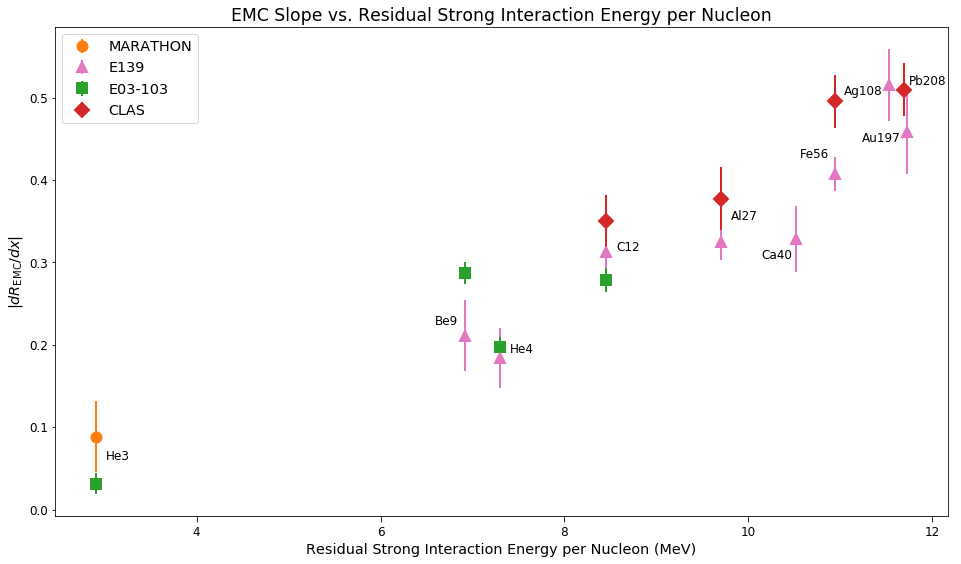

In [11]:
plt.figure(figsize=(16,9))
plt.errorbar(x=marathon.RSIE_A, y=marathon.Slope, yerr=marathon.Slope_Error, fmt='C1o', label = 'MARATHON', ms=10, mew=2, elinewidth=2)
plt.errorbar(x=E139.RSIE_A, y=E139.Slope, yerr=E139.Slope_Error, fmt='C6^', label = 'E139', ms=10, mew=2, elinewidth=2)
plt.errorbar(x=E03103.RSIE_A, y=E03103.Slope, yerr=E03103.Slope_Error, fmt='C2s', label = 'E03-103', ms=10, mew=2, elinewidth=2)
plt.errorbar(x=CLAS.RSIE_A, y=CLAS.Slope, yerr=CLAS.Slope_Error, fmt='C3D', label = 'CLAS', ms=10, mew=2, elinewidth=2)

#plt.gca().set(xlim=(2,10))

plt.legend(loc=2,fontsize='x-large')
plt.title('EMC Slope vs. Residual Strong Interaction Energy per Nucleon',fontsize='xx-large')
plt.xlabel('Residual Strong Interaction Energy per Nucleon (MeV)',fontsize='x-large')
plt.ylabel(r'$\left|dR_{\mathrm{EMC}}/dx\right|$',fontsize='x-large')

plt.xticks(fontsize='large')
plt.yticks(fontsize='large')

plt.gca().tick_params(axis='both', which='minor', length=3)
plt.gca().tick_params(axis='x', which='major', length=6)

for index, row in annotations.iterrows():
    if index == 'Ca40' or index == 'Fe56':
        plt.annotate(index, xy = (row.RSIE_A,row.Slope), xytext = (-35,-20), textcoords = 'offset points',size = 'large')
    elif index == 'Au197' or index == 'Ag108':
        plt.annotate(index, xy = (row.RSIE_A,row.Slope), xytext = (-45,-10), textcoords = 'offset points',size = 'large')
    elif index == 'Pb208':
        plt.annotate(index, xy = (row.RSIE_A,row.Slope), xytext = (5,5), textcoords = 'offset points',size = 'large')
    elif index == 'Be9':
        plt.annotate(index, xy = (row.RSIE_A,row.Slope), xytext = (-30,-20), textcoords = 'offset points',size = 'large')
    else:
        plt.annotate(index, xy = (row.RSIE_A,row.Slope), xytext = (10,0), textcoords = 'offset points',size = 'large')

#plt.xscale('log')

plt.savefig(outf + 'EMC_vs_RSIE.eps')

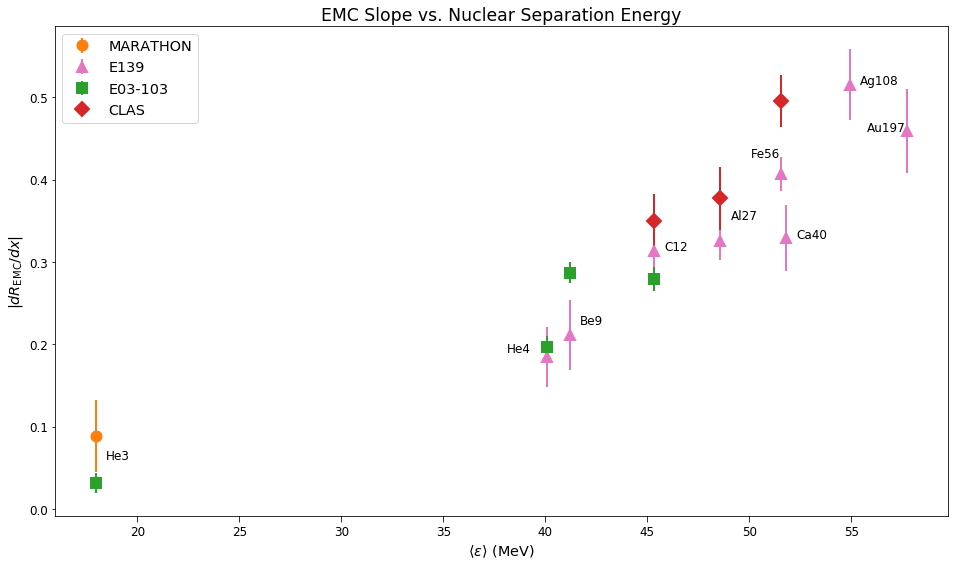

In [12]:
m = marathon.query('NSep!=0')
E1 = E139.query('NSep!=0')
E0 = E03103.query('NSep!=0')
C = CLAS.query('NSep!=0')
a = annotations.query('NSep!=0')

plt.figure(figsize=(16,9))
plt.errorbar(x=m.NSep, y=m.Slope, yerr=m.Slope_Error, fmt='C1o', label = 'MARATHON', ms=10, mew=2, elinewidth=2)
plt.errorbar(x=E1.NSep, y=E1.Slope, yerr=E1.Slope_Error, fmt='C6^', label = 'E139', ms=10, mew=2, elinewidth=2)
plt.errorbar(x=E0.NSep, y=E0.Slope, yerr=E0.Slope_Error, fmt='C2s', label = 'E03-103', ms=10, mew=2, elinewidth=2)
plt.errorbar(x=C.NSep, y=C.Slope, yerr=C.Slope_Error, fmt='C3D', label = 'CLAS', ms=10, mew=2, elinewidth=2)

plt.legend(loc=2,fontsize='x-large')
plt.title('EMC Slope vs. Nuclear Separation Energy',fontsize='xx-large')
plt.xlabel(r'$\left<\epsilon\right>$ (MeV)',fontsize='x-large')
plt.ylabel(r'$\left|dR_{\mathrm{EMC}}/dx\right|$',fontsize='x-large')

plt.xticks(fontsize='large')
plt.yticks(fontsize='large')

plt.gca().tick_params(axis='both', which='minor', length=3)
plt.gca().tick_params(axis='x', which='major', length=6)

for index, row in a.iterrows():
    if index == 'He4' or index == 'Au197':
        plt.annotate(index, xy = (row.NSep,row.Slope), xytext = (-40,0), textcoords = 'offset points',size = 'large')
    elif index == 'Be9':
        plt.annotate(index, xy = (row.NSep,row.Slope), xytext = (10,-20), textcoords = 'offset points',size = 'large')
    elif index == 'Fe56':
        plt.annotate(index, xy = (row.NSep,row.Slope), xytext = (-30,-20), textcoords = 'offset points',size = 'large')
    else:
        plt.annotate(index, xy = (row.NSep,row.Slope), xytext = (10,0), textcoords = 'offset points',size = 'large')

#plt.xscale('log')

plt.savefig(outf + 'EMC_vs_NSep.eps')

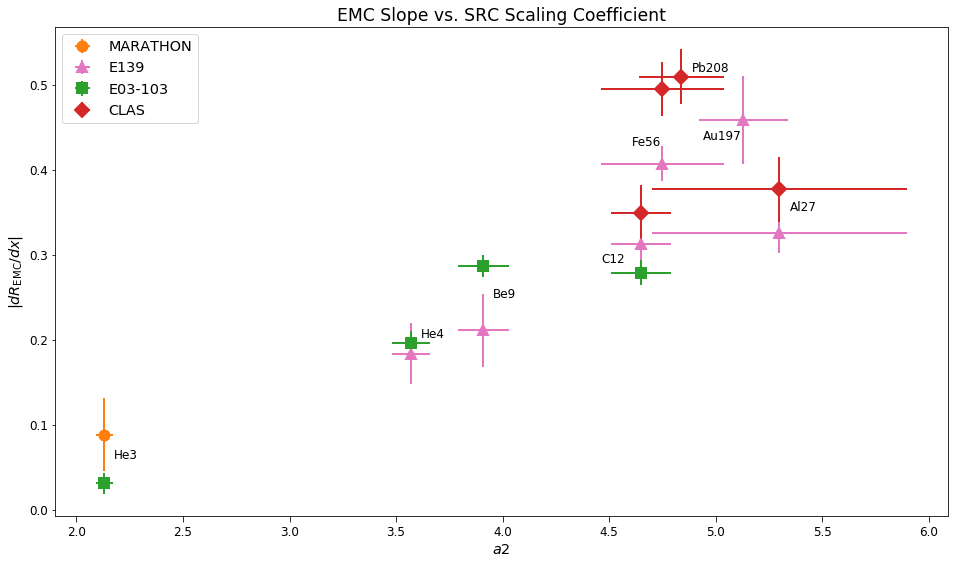

In [13]:
m = marathon.query('a2!=0')
E1 = E139.query('a2!=0')
E0 = E03103.query('a2!=0')
C = CLAS.query('a2!=0')
a = annotations.query('a2!=0')

plt.figure(figsize=(16,9))
plt.errorbar(x=m.a2, xerr=m.a2_Error, y=m.Slope, yerr=m.Slope_Error, fmt='C1o', label = 'MARATHON', ms=10, mew=2, elinewidth=2)
plt.errorbar(x=E1.a2, xerr=E1.a2_Error, y=E1.Slope, yerr=E1.Slope_Error, fmt='C6^', label = 'E139', ms=10, mew=2, elinewidth=2)
plt.errorbar(x=E0.a2, xerr=E0.a2_Error, y=E0.Slope, yerr=E0.Slope_Error, fmt='C2s', label = 'E03-103', ms=10, mew=2, elinewidth=2)
plt.errorbar(x=C.a2, xerr=C.a2_Error, y=C.Slope, yerr=C.Slope_Error, fmt='C3D', label = 'CLAS', ms=10, mew=2, elinewidth=2)

plt.legend(loc=2,fontsize='x-large')
plt.title('EMC Slope vs. SRC Scaling Coefficient',fontsize='xx-large')
plt.xlabel(r'$a2$',fontsize='x-large')
plt.ylabel(r'$\left|dR_{\mathrm{EMC}}/dx\right|$',fontsize='x-large')

plt.xticks(fontsize='large')
plt.yticks(fontsize='large')

plt.gca().tick_params(axis='both', which='minor', length=3)
plt.gca().tick_params(axis='x', which='major', length=6)

for index, row in a.iterrows():
#    plt.annotate(index, xy = (row.a2,row.Slope), xytext = (10,0), textcoords = 'offset points',size = 'large')
    if index == 'C12' or index == 'Au197':
        plt.annotate(index, xy = (row.a2,row.Slope), xytext = (-40,-20), textcoords = 'offset points',size = 'large')
    elif index == 'He4':
        plt.annotate(index, xy = (row.a2,row.Slope), xytext = (10,10), textcoords = 'offset points',size = 'large')
    elif index == 'Pb208':
        plt.annotate(index, xy = (row.a2,row.Slope), xytext = (10,5), textcoords = 'offset points',size = 'large')
    elif index == 'Fe56':
        plt.annotate(index, xy = (row.a2,row.Slope), xytext = (-30,-20), textcoords = 'offset points',size = 'large')
    else:
        plt.annotate(index, xy = (row.a2,row.Slope), xytext = (10,0), textcoords = 'offset points',size = 'large')

#plt.xscale('log')

plt.savefig(outf + 'EMC_vs_a2.eps')